## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [72]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [71]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [70]:
# Combine the data into a single dataset
m=pd.merge(mouse_metadata,study_results,on="Mouse ID")
m.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the DataFrame.
m['Mouse ID'].nunique()


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
m=m.sort_values(['Mouse ID', 'Timepoint'], ascending=[True, True])
d=m.drop_duplicates(subset="Mouse ID",keep="last")
d.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1


In [68]:
# Checking the number of mice in the clean DataFrame.
d["Mouse ID"].count()

249

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = d[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
mean = mean.rename(columns={"Tumor Volume (mm3)":"Mean"})

median = d[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
median = median.rename(columns={"Tumor Volume (mm3)":"Median"})

variance = d[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
variance = variance.rename(columns={"Tumor Volume (mm3)":"Variance"})

std = d[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
std = std.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})

sem = d[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
sem = sem.rename(columns={"Tumor Volume (mm3)":"SEM"})

m1 = pd.merge(mean,median,on="Drug Regimen")
m2 = pd.merge(variance,std,on="Drug Regimen")
m3 = pd.merge(m1,m2,on="Drug Regimen")

summary = pd.merge(m3,sem,on="Drug Regimen")
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

In [48]:
b=m[["Drug Regimen","Mouse ID"]].groupby("Drug Regimen").count()
b=b.sort_values("Mouse ID",ascending=False)
b

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


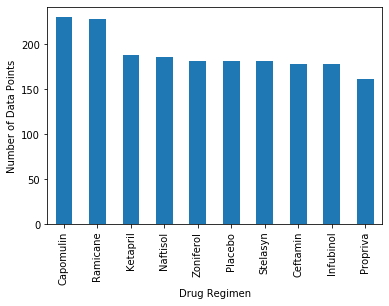

In [66]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
b.plot(kind="bar",legend=None)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

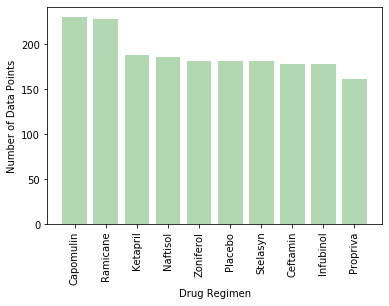

In [59]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x=list(b.index.values)
y=b["Mouse ID"]
plt.bar(x,y,color='g',alpha = 0.3, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.show()

## Pie Plots

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
s=m[["Sex","Mouse ID"]].groupby("Sex").count()
s=s.sort_values("Sex",ascending=False)
s

,Mouse ID
Sex,
Male,958
Female,935


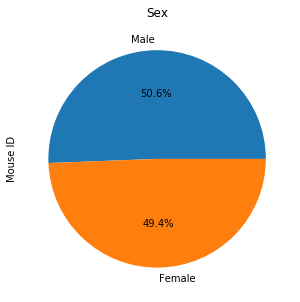

In [97]:
s.plot(kind="pie", figsize=(20,5),autopct='%1.1f%%',legend = False,subplots=True)

# Set a title for the chart
plt.title("Sex")

plt.show()


In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

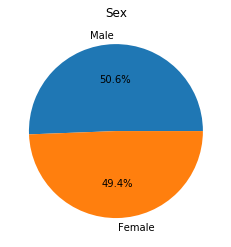

In [95]:
labels = list(s.index.values)
sex = s["Mouse ID"]
explode = (0,0)
plt.title("Sex")
plt.pie(sex,explode=explode,labels=labels, autopct="%1.1f%%",shadow=False,startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [27]:
d.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1


In [28]:
Capomulin = d.loc[d["Drug Regimen"]=="Capomulin"]
Capomulin_tumor = Capomulin["Tumor Volume (mm3)"]
Capomulin_tumor

Ramicane = d.loc[d["Drug Regimen"]=="Ramicane"]
Ramicane_tumor = Ramicane["Tumor Volume (mm3)"]

Infubinol = d.loc[d["Drug Regimen"]=="Infubinol"]
Infubinol_tumor = Infubinol["Tumor Volume (mm3)"]

Ceftamin = d.loc[d["Drug Regimen"]=="Ceftamin"]
Ceftamin_tumor = Ceftamin["Tumor Volume (mm3)"]

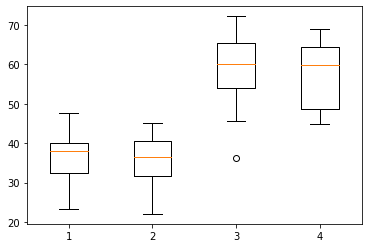

In [29]:
plt.boxplot([Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor])
plt.show()

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [42]:
c = d[d["Drug Regimen"]=="Capomulin"]
c.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2


In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
l = m.loc[m["Drug Regimen"]=="Capomulin"]
l.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


In [33]:
mouse_l509 = m.loc[m["Mouse ID"]=="l509"]
mouse_l509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


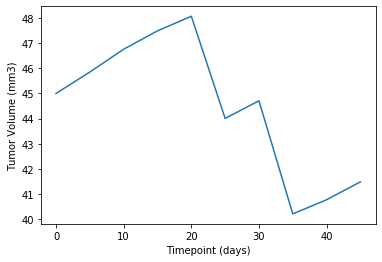

In [99]:
timepoint = mouse_l509["Timepoint"]
tumor_volume = mouse_l509["Tumor Volume (mm3)"]
plt.plot(timepoint, tumor_volume)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
        

In [108]:
r = m[m["Drug Regimen"]=="Capomulin"]
r

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [111]:
r=r.groupby("Mouse ID").mean()
r.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


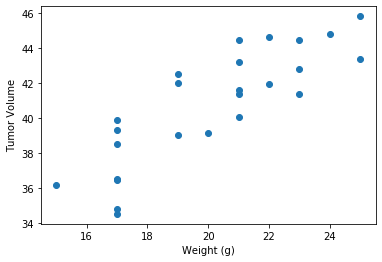

In [117]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = r.iloc[:,1]
average_tumor_volume = r.iloc[:,3]

plt.scatter(weight,average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.show()


## Correlation and Regression

In [118]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,average_tumor_volume)

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


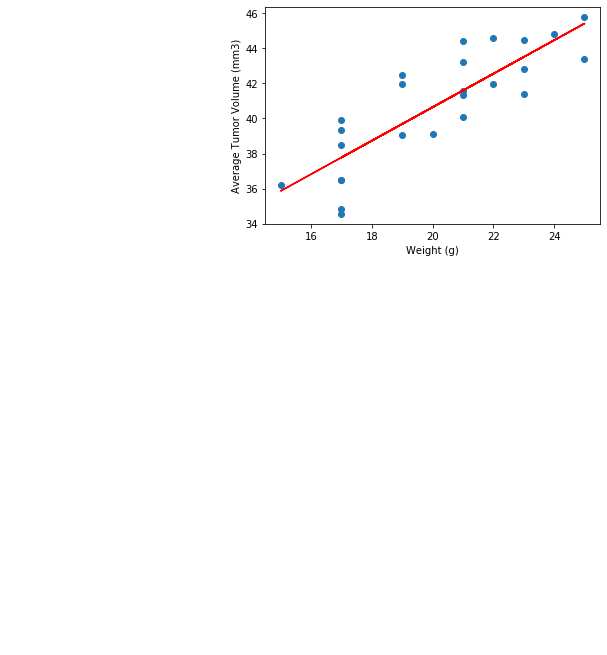

In [120]:
# Add the linear regression equation and line to plot

from scipy.stats import linregress

weight = r.iloc[:,1]
average_tumor_volume = r.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,average_tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()